given an input we want to predict an output - use linear regression 

LR tries to put a linear function output 

if we have 3 obserbations x1,x2,x3
then LR assumes y to be
y = m1.x1+m2.x2+m3.x3 + b
from the training data the model calculated m1,m2,m3 and b

LR assumes linear trend between x and y

### exploring LR with dummy data 

In [1]:
import numpy as np

In [2]:
data = np.loadtxt("data.csv",delimiter=',')
print(data.shape)
print (data)

(100, 2)
[[ 32.50234527  31.70700585]
 [ 53.42680403  68.77759598]
 [ 61.53035803  62.5623823 ]
 [ 47.47563963  71.54663223]
 [ 59.81320787  87.23092513]
 [ 55.14218841  78.21151827]
 [ 52.21179669  79.64197305]
 [ 39.29956669  59.17148932]
 [ 48.10504169  75.3312423 ]
 [ 52.55001444  71.30087989]
 [ 45.41973014  55.16567715]
 [ 54.35163488  82.47884676]
 [ 44.1640495   62.00892325]
 [ 58.16847072  75.39287043]
 [ 56.72720806  81.43619216]
 [ 48.95588857  60.72360244]
 [ 44.68719623  82.89250373]
 [ 60.29732685  97.37989686]
 [ 45.61864377  48.84715332]
 [ 38.81681754  56.87721319]
 [ 66.18981661  83.87856466]
 [ 65.41605175 118.5912173 ]
 [ 47.48120861  57.25181946]
 [ 41.57564262  51.39174408]
 [ 51.84518691  75.38065167]
 [ 59.37082201  74.76556403]
 [ 57.31000344  95.45505292]
 [ 63.61556125  95.22936602]
 [ 46.73761941  79.05240617]
 [ 50.55676015  83.43207142]
 [ 52.22399609  63.35879032]
 [ 35.56783005  41.4128853 ]
 [ 42.43647694  76.61734128]
 [ 58.16454011  96.76956643]
 [ 57

In [3]:
x = data[:,0].reshape(-1,1)
y = data[:,1].reshape(-1,1)


In [4]:
from sklearn import model_selection 
xtrain, xtest, ytrain, ytest = model_selection.train_test_split(x,y)
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(75, 1)
(75, 1)
(25, 1)
(25, 1)


In [5]:
from sklearn.linear_model import LinearRegression
algo = LinearRegression()
algo.fit(xtrain,ytrain)
#error because we had to pass 2d arrays, x and y are 1d

LinearRegression()

In [6]:
#LR should've figured out a line now (y=mx+c)
algo.coef_ #this is m
algo.intercept_ #this is c 

array([11.22815319])

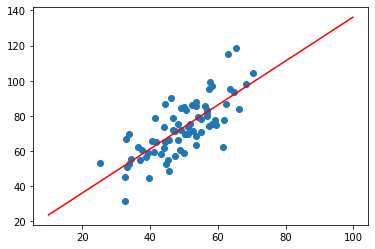

In [7]:
#plotting training data 
import matplotlib.pyplot as plt
plt.scatter(xtrain,ytrain)
#plotting a mx+c line 
m = algo.coef_[0]
c =algo.intercept_[0]

x_line = np.arange(10,100,0.1)
y = m * x_line + c
plt.plot(x_line,y,color = "red")
plt.show()

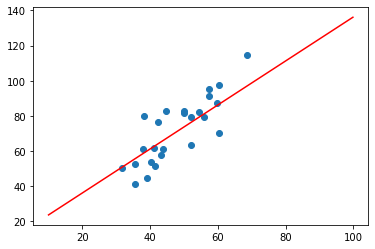

In [8]:
#plotting test data results
import matplotlib.pyplot as plt
plt.scatter(xtest,ytest)
#plotting a mx+c line 
m = algo.coef_[0]
c =algo.intercept_[0]

x_line = np.arange(10,100,0.1)
y = m * x_line + c
plt.plot(x_line,y,color = "red")
plt.show()

In [9]:
#plotting is not always the right way to figure out if the algo is good or bad 

we use coefficient of determination 1-u/v
- u = summation(yi(actual)- yi(predicted) )^2 
- v = summation (y1(actual)- yi(actual mean))^2

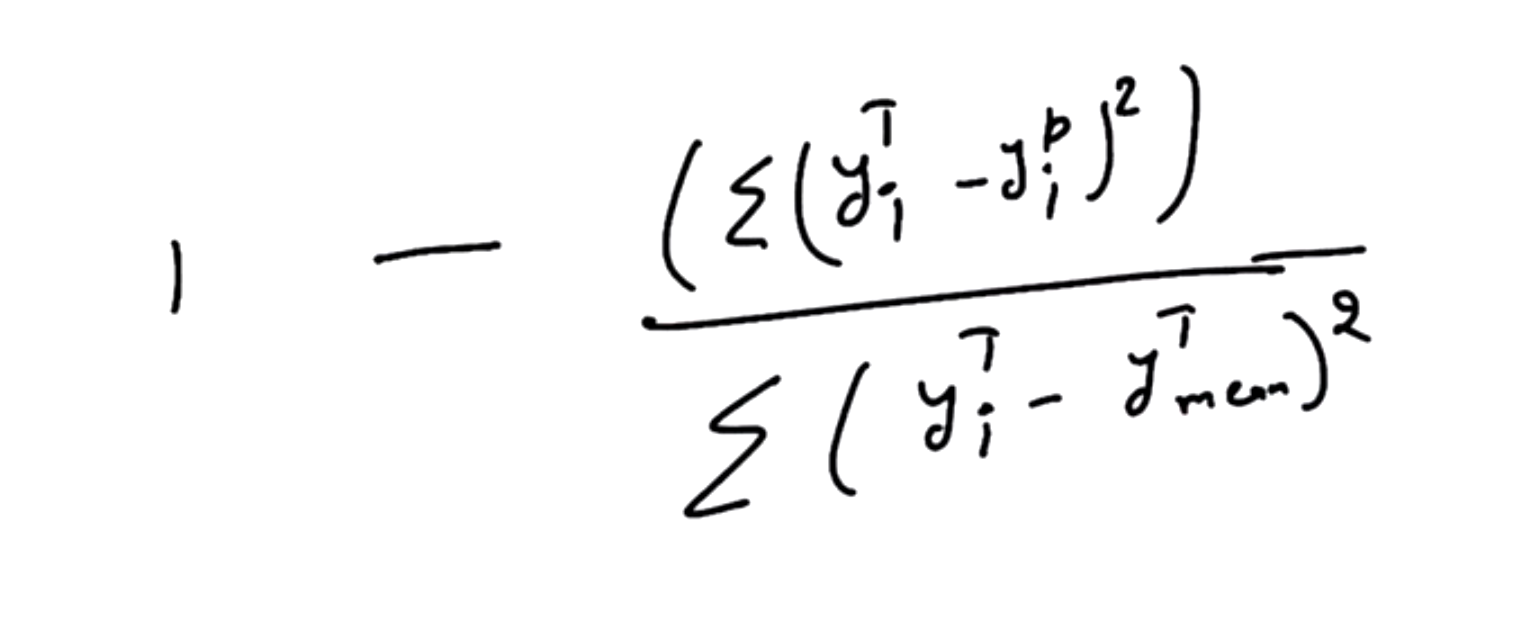

we want this score to be between 0 and 1 and higher is better
- numberator means we are conmparing the actual error, how far away are the predicted values and then squaring it
- demoninator tells- lets just predict the mean of all of the values and predict that for everything 

if predictions are very bad then the predictions are very bad 
- if -ve then much worse 


Best predictions will be with score 1

so, u means error in predictions, v means the error if all predictions were mean

In [14]:
#finding score of train data

train = algo.score(xtrain,ytrain)
print(train)

(75, 1)


(75, 1)

In [17]:
#finding score of test data
test = algo.score(xtest,ytest)
print(test)
#almost equal

(25, 1)


In [12]:
#the algorithm is doing decent, just okay